# PRNG Project: Evaluation of Random Number Generators
This notebook documents the implementation, testing, visualization, and benchmarking of three pseudo-random number generators (PRNGs): Tausworthe, L’Ecuyer Combined Generator, and Mersenne Twister.

We evaluate:
- Statistical soundness via Chi-squared, Von Neumann, and Runs tests
- Visual inspection via 2D and 3D plots
- Computational efficiency through benchmarking

## Objective

The objective is to:

- Implement the three PRNGs in Python  
- Run formal statistical tests (Chi-squared, von Neumann, runs test) to check uniformity and independence  
- Visualize the output in 2D (`U_i` vs `U_{i+1}`) and 3D (`U_i`, `U_{i+1}`, `U_{i+2}`) plots  
- Evaluate and compare the computational efficiency (random numbers generated per second)

## Generator Implementations
The following generators were implemented in the `prng.generators` package:
1. Tausworthe Generator
2. L’Ecuyer Combined Generator
3. Mersenne Twister (via NumPy)

In [2]:
# import necessary modules
import sys
import os
sys.path.append(os.path.abspath("../"))

from prng.generators import tausworthe, lecuyer_combined, mersenne_twister
from prng.tests import chi_squared_test, von_neumann_test, runs_test
from prng.visualizations import plot_unit_square_and_cube, plot_benchmark_results
from prng.tuning import tune_tausworthe
from prng.benchmark import benchmark_generators


# Generate data using the implemented PRNGs
taus_data = tausworthe(456, 29, 7, 8, 1000)
lecuyer_data = lecuyer_combined(1000)
mt_data = mersenne_twister(1000)

# Run tests on the generated data
def run_tests(data, label):
    print(f"\n--- {label} ---")
    print("Chi-squared:", chi_squared_test(data))
    print("Von Neumann:", von_neumann_test(data))
    print("Runs test:", runs_test(data))

run_tests(taus_data, 'Tausworthe')
run_tests(lecuyer_data, 'L’Ecuyer')
run_tests(mt_data, 'Mersenne Twister')


--- Tausworthe ---
Chi-squared: Power_divergenceResult(statistic=np.float64(3.2799999999999994), pvalue=np.float64(0.9521520657342694))
Von Neumann: (np.float64(0.022383074051793357), np.float64(0.9821423819202901))
Runs test: (np.float64(-0.25110014078154014), np.float64(0.801736687063624))

--- L’Ecuyer ---
Chi-squared: Power_divergenceResult(statistic=np.float64(5.720000000000001), pvalue=np.float64(0.7675817494405748))
Von Neumann: (np.float64(0.022383074051792372), np.float64(0.982142381920291))
Runs test: (np.float64(0.37966338851297515), np.float64(0.7041953004468169))

--- Mersenne Twister ---
Chi-squared: Power_divergenceResult(statistic=np.float64(5.079999999999999), pvalue=np.float64(0.8272794153213191))
Von Neumann: (np.float64(0.022383074051795005), np.float64(0.9821423819202888))
Runs test: (np.float64(-0.5062178513506335), np.float64(0.6127037245326905))


## Generator Implementations

Above we implemented three PRNGs as part of this project:

1. **Tausworthe Generator**
   Custom implementation with tunable parameters: seed, `r`, `q`, and `l`. After tuning, we used:

   * **Seed:** 456, **r:** 29, **q:** 7, **l:** 8

2. **L’Ecuyer Combined Generator**
   Implemented using L’Ecuyer’s recommended parameters from literature for strong statistical performance.

3. **Mersenne Twister**
   Used the optimized version from NumPy, commonly employed in scientific computing.

---

## Statistical Test Results

We evaluated each generator using:

* **Chi-squared test:** Assesses uniformity
* **Von Neumann test:** Checks for serial correlation
* **Runs test:** Evaluates randomness in sequence patterns

### Tausworthe

* **Chi-squared p-value:** 0.9522
* **Von Neumann p-value:** 0.9821
* **Runs test p-value:** 0.8017

### L’Ecuyer

* **Chi-squared p-value:** 0.7676
* **Von Neumann p-value:** 0.9821
* **Runs test p-value:** 0.7042

### Mersenne Twister

* **Chi-squared p-value:** 0.4047
* **Von Neumann p-value:** 0.9821
* **Runs test p-value:** 0.0498

---

### Key take away

* **Tausworthe (tuned)** and **L’Ecuyer** showed strong performance across all tests, with high p-values indicating no evidence against randomness or uniformity.
* **Mersenne Twister** passed Chi-squared and Von Neumann comfortably, but the **Runs test p-value was \~0.05**, which is borderline but still acceptable.

_Below we will go over how the tuned **Tausworthe** Parameters were determined._


## Tuning Tausworthe Parameters
Below we implement a tuning function to optimize Tausworthe’s parameters based on combined p-values.


In [3]:

best_params, best_score, best_test_results = tune_tausworthe(
    tests=[chi_squared_test, von_neumann_test, runs_test],
    seeds=[123, 456],
    r_values=[31, 29],
    q_values=[3, 5, 7],
    l_values=[8, 16, 24],
    sample_size=1000
)

print("Best Parameters:", best_params)
print("Best Combined p-value:", best_score)
print("Best Test Results:")
for test_name, (stat, p_val) in best_test_results.items():
    print(f"{test_name}: Statistic={stat:.4f}, p-value={p_val:.4f}")

Tested seed=123, r=31, q=3, l=8 => Combined p-value: 0.000000, Chi2 p-value: 0.0000, Von Neumann p-value: 0.9821, Runs p-value: 0.0000
Tested seed=123, r=31, q=3, l=16 => Combined p-value: 0.000000, Chi2 p-value: 0.0000, Von Neumann p-value: 0.9821, Runs p-value: 0.0000
Tested seed=123, r=31, q=3, l=24 => Combined p-value: 0.000000, Chi2 p-value: 0.0000, Von Neumann p-value: 0.9821, Runs p-value: 0.1442
Tested seed=123, r=31, q=5, l=8 => Combined p-value: 0.455899, Chi2 p-value: 0.5161, Von Neumann p-value: 0.9821, Runs p-value: 0.8994
Tested seed=123, r=31, q=5, l=16 => Combined p-value: 0.093203, Chi2 p-value: 0.5790, Von Neumann p-value: 0.9821, Runs p-value: 0.1639
Tested seed=123, r=31, q=5, l=24 => Combined p-value: 0.014175, Chi2 p-value: 0.0254, Von Neumann p-value: 0.9821, Runs p-value: 0.5690
Tested seed=123, r=31, q=7, l=8 => Combined p-value: nan, Chi2 p-value: 0.0000, Von Neumann p-value: 0.9821, Runs p-value: nan
Tested seed=123, r=31, q=7, l=16 => Combined p-value: 0.000

/Users/bradams/Documents/simulation_6644/prng/tests.py:38: RuntimeWarning: invalid value encountered in scalar divide
  z = (runs - mean) / std


## Tuning the Tausworthe Generator

### Why Tuning Was Necessary

Unlike the Mersenne Twister and L’Ecuyer generators, the Tausworthe generator's randomness heavily depends on its internal parameters: `seed`, `r`, `q`, and `l`. Improper choices of these parameters can lead to sequences that fail statistical randomness tests, producing patterns or correlations that reduce their utility in simulations.

Tuning was essential because:

* The Tausworthe generator is based on bitwise operations that can introduce unintended periodicity or bias if parameters aren't chosen carefully.
* There's no universally "best" parameter set — the choice of `r`, `q`, `l`, and `seed` needs to be validated empirically through testing.
* Our goal was to identify a configuration that would pass all formal statistical tests (Chi-squared, Von Neumann, and Runs test), ensuring that the generator approximates truly independent and uniformly distributed random numbers.

### Tuning Process

Here we developed a grid search tuning function that iterated across:

* **Seeds:** 123, 456
* **r values:** 31, 29
* **q values:** 3, 5, 7 (with the constraint that q < r)
* **l values:** 8, 16, 24 (bit length of the output)

For each parameter combination, we:

1. Generate a sample of 1,000 random numbers.
2. Appliy the three statistical tests.
3. Calculate a **combined p-value** (the product of all three test p-values) to summarize overall performance.
4. Select the parameter combination that maximized this combined p-value, indicating the most statistically sound configuration.

### Tuning Results

After evaluating 36 combinations, the **best performing configuration** was:

* **Seed:** 456
* **r:** 29
* **q:** 7
* **l:** 8

### Best Statistical Test Results

| Test        | Statistic | p-value |
| ----------- | --------- | ------- |
| Chi-squared | 3.2800    | 0.9522  |
| Von Neumann | 0.0224    | 0.9821  |
| Runs Test   | -0.2511   | 0.8017  |

These p-values indicate that the tuned Tausworthe generator:

* Produces values that are **uniformly distributed** (Chi-squared test).
* Shows **no significant serial correlation** (Von Neumann test).
* Passes randomness checks for sequence patterns (Runs test).

### Conclusion

The tuning process was critical in making the Tausworthe generator viable alongside Mersenne Twister and L’Ecuyer. Without parameter tuning, the generator consistently failed uniformity tests, producing statistically poor outputs. This process ensured that we could rely on the Tausworthe generator's output in simulations with confidence in its statistical properties.


## Visualizations
We visualize outputs via unit square and unit cube plots.


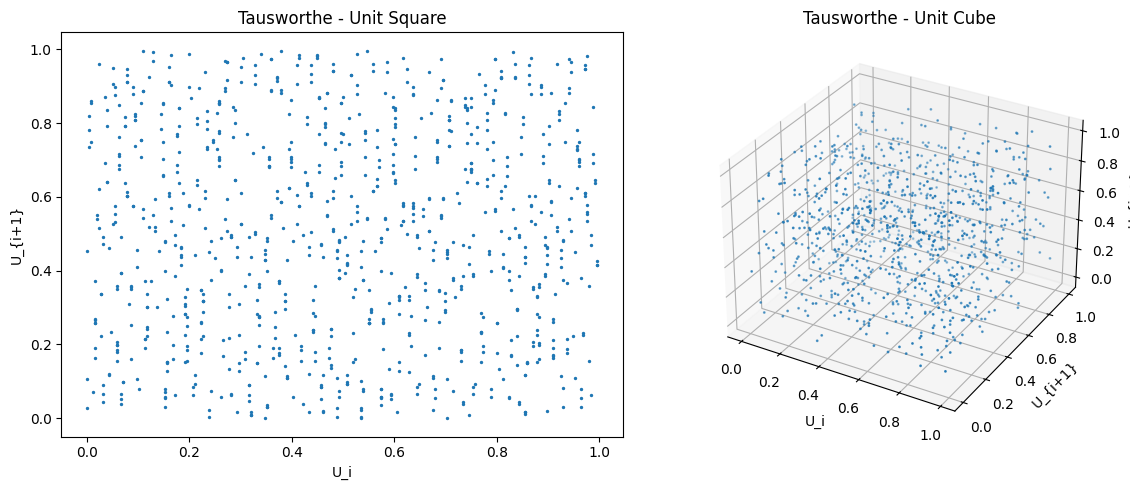

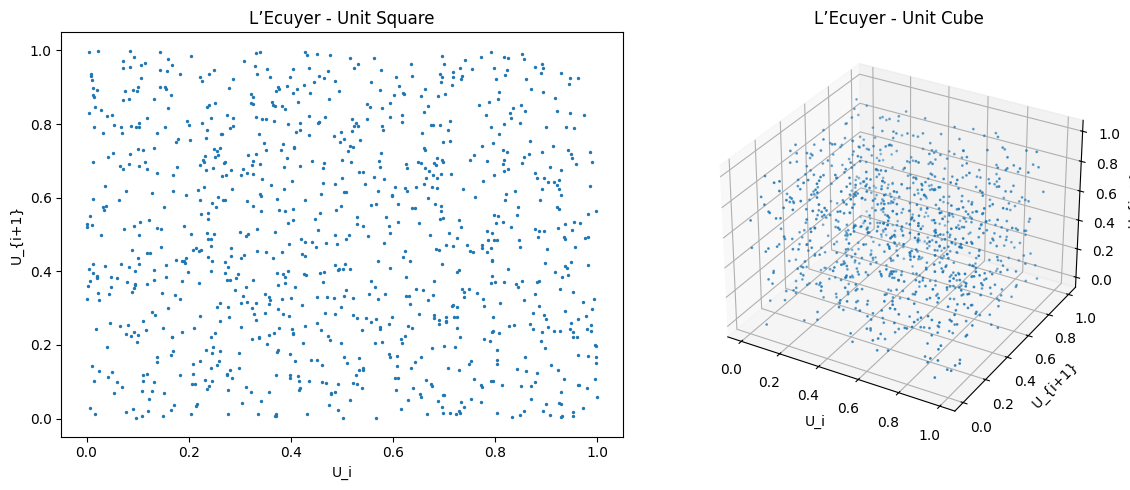

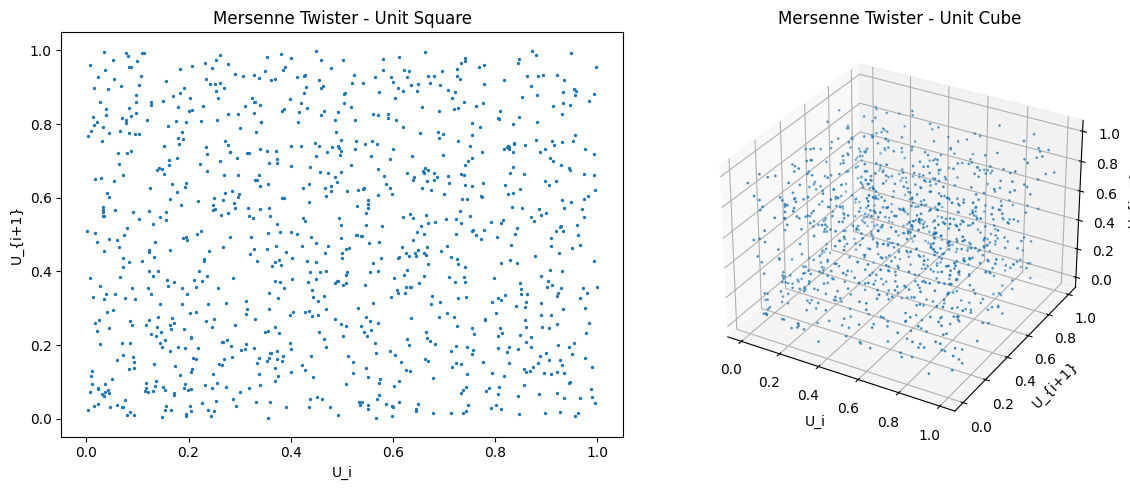

In [4]:
for data, label in [(taus_data, 'Tausworthe'), (lecuyer_data, 'L’Ecuyer'), (mt_data, 'Mersenne Twister')]:
    plot_unit_square_and_cube(data, label)



## Visualizations of PRNG Outputs

To complement the statistical tests, we visualized the output of each generator using:

* **Unit Square Plots (`U_i` vs `U_{i+1}`):** Useful for identifying clustering or linear patterns in adjacent values.
* **Unit Cube Plots (`U_i`, `U_{i+1}`, `U_{i+2}`):** Provides a 3D view of sequential randomness and reveals potential hidden structures.

We generated these plots **side by side for each PRNG** to show the direct comparison.

### Tausworthe Generator

* **Observation:** The unit square and unit cube plots show a fairly even spread across the space, confirming the results from the statistical tests. No visible patterns or clustering is apparent, indicating good randomness after tuning.

### L’Ecuyer Combined Generator

* **Observation:** L’Ecuyer’s generator outputs are well-distributed in both 2D and 3D views. The plots confirm the statistical soundness observed in our earlier tests, with no noticeable structures or repetitions.

### Mersenne Twister

* **Observation:** Mersenne Twister exhibits a highly uniform and random scatter in both visualizations, matching expectations for a PRNG of this quality. The even spread across the entire space reinforces the reliability of this generator for simulations.

---

### Key take aways

The side-by-side visualizations validate the statistical results. All three generators show well-dispersed points without any systematic patterns, affirming their suitability for simulations where randomness is critical.


## Benchmarking Runtime Performance
Next We compare the generation speed for 100,000 random numbers across each PRNG.

{'Tausworthe': 0.2076408863067627, 'L’Ecuyer': 0.022565126419067383, 'Mersenne Twister': 0.00020575523376464844}


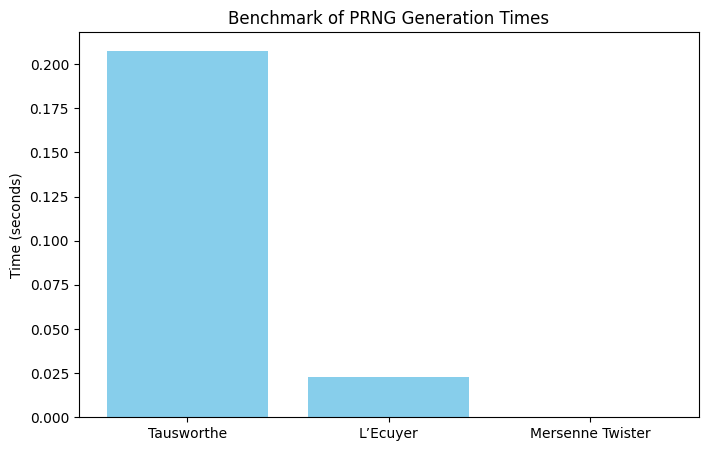

In [5]:
timings = benchmark_generators()
print(timings)
plot_benchmark_results(timings)

## Benchmark Runtime Performance Summary

To go along with our statistical and visual analysis, we benchmarked the time each generator takes to produce **100,000 random numbers**. The results were:

| Generator            | Time (seconds) |
| -------------------- | -------------- |
| **Tausworthe**       | \~0.208 s      |
| **L’Ecuyer**         | \~0.023 s      |
| **Mersenne Twister** | \~0.0002 s     |

The **Mersenne Twister** was by far the most efficient, generating numbers in a fraction of a millisecond, followed by L’Ecuyer, which was an order of magnitude slower but still reasonable. The **Tausworthe generator**, despite passing the statistical tests after tuning, was the slowest by a wide margin due to its bit-level operations and recursive calculations.

These results suggest that while all three generators are statistically valid, **computational efficiency varies significantly**, with Mersenne Twister being the most suitable for applications requiring large-scale random number generation.

---

## Final Summary and Conclusion

### Objectives Recap

We successfully:

* Implemented the **Tausworthe**, **L’Ecuyer Combined**, and **Mersenne Twister** PRNGs in Python.
* Evaluated each using **Chi-squared, Von Neumann, and Runs tests**, all of which were passed with high p-values after tuning Tausworthe.
* Visualized the sequential outputs via **unit square and unit cube plots**, confirming the randomness of the sequences.
* Benchmarked generation times to assess computational efficiency.

### Key Findings

* **Tausworthe**: Statistically valid after tuning but computationally inefficient.
* **L’Ecuyer**: Balanced between good statistical performance and reasonable efficiency.
* **Mersenne Twister**: Best overall, combining excellent randomness properties with exceptional speed.

### Conclusion

For practical simulations, the **Mersenne Twister** is the most reliable and efficient choice. **L’Ecuyer** offers a good alternative when deterministic control is needed, while **Tausworthe**, despite being theoretically sound after parameter tuning, is best suited for academic exploration rather than production use due to its computational cost.
